# ORIE 4580/5580/5581 Assignment 5

#### Students: Shiyu Chen (sc3283) and Mingyi Yao(my533)

### Github link: [Github link](https://github.com/Mingyi-Yao/ORIE5580/blob/main/HW5_5580.ipynb)


### Instructions


* Due Friday, October 13, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import math
from scipy.stats import chisquare
from scipy.stats import kstest, uniform
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline




---
---


# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

___
## Ans.


The targetted rate is $\frac{10}{N}$. Therefore, the visit of tagged birds follow $Poisson(\frac{10}{N} \lambda)$. The visit of all different birds follow $Poisson(\lambda)$. We use $N$ to denote the number of birds, $t$ to denote the unit of time. For the first arrival process, the mean is $\frac{10}{N} \lambda \cdot t$. For the second arrival process, the mean is $\lambda \cdot t$. Then we can use $MOM$ to estimate the number of $N$.

To count number of visits, we have two equations:

$$\frac{10}{N} \lambda \cdot t = 6$$
$$\lambda \cdot t = 28.8$$

Therefore, the $N_{MOM}$ is 48.


___

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

___

## Ans.



Number of tagged birds: $Poisson(\frac{10}{N} \lambda t)$.

Number of untagged birds: $Poisson(\frac{N-10}{N} \lambda t)$

Because the arrival of tagged birds and untagged birds are independent, then the Likelihood function is:

$L = \frac{e^{-\frac{10}{N}} (\frac{10}{N} \lambda)^4}{4!} \cdot \frac{e^{-\frac{N-10}{N}} (\frac{N-10}{N} \lambda)^{16}}{16!}$

The goal is to get a MLE estimate for $\lambda$. Due to the transition property of MLE, $N_{MLE} = \lambda_{MLE} * t$. Here, we assume t = 1 (one week). Then, $N_{MLE} = \lambda_{MLE}$

By taking logarithm to the likelihood function and take derivative with respect to $\lambda$, we can get $\lambda_{MLE}$ is 20. Thus, $N_{MLE}$ is 20.


___
___

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

___

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?
___


Geometric Distribution: $P(N=k)=(1-p)^k \cdot p $.
In our case, since the number of servings is at most 40, then the pmf of our distribution is:
$$
\begin{aligned}
& P(N=k)= \begin{cases}(1-p)^k \cdot p & k=0, 1,2,3, \cdots 39 \\
\sum_{k=40}^{\infty}(1-p)^k \cdot p & k = 40\end{cases} \\
&
\end{aligned}
$$

Since $ \sum_{k=40}^{\infty}(1-p)^k \cdot p=p \sum_{k=40}^{\infty}(1-p)^k
 =p \cdot \frac{(1-p)^{40}}{1-(1-p)}
 =(1-p)^{40} $

Then,
$$
\begin{aligned}
& P(N=k)= \begin{cases}(1-p)^k \cdot p & k=0, 1,2,3,4, \cdots 39 \\
(1-p)^{40} & k = 40\end{cases} \\
&
\end{aligned}
$$

## Ans.


___

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.
___

## Ans.


Sample data: $N_1, \cdots N_{100}$. $m$ is the number of days when the demand is less than 40. $n$ is number of days when the demand is equal to 40.
$$
\begin{aligned}
& L(p)=\prod_{i=1}^n(1-p)^{N i} \cdot p+\prod_{j=1}^m(1-p)^{40} . \\
& =(1-p)^{\sum_{i=1}^n N_i} \cdot p^n+(1-p)^{40 m} \\
& \log L(p)=\sum_{i=1}^n N_i \cdot \log (1-p)+n \log p+40 m \log (1-p) \\
& \frac{\partial \log L(p)}{\partial p}=\frac{-\sum_{i=1}^n N_i}{1-p}+\frac{n}{p}-\frac{40 m}{1-p} \stackrel{\text { set }}{=} 0 \\
& \frac{n}{p}=\frac{\sum_{i=1}^n N_i+40 m}{1-p} \\
& n(1-p)=p\left(\sum_{i=1}^n N_i+40 m\right) \\
& n=P\left(n+\sum_{i=1}^n N_i+40 m\right) \\
& \hat{P}_{\text {MLE}}=\frac{n}{n+\sum_{i=1}^n N_j+40 m} \\
&
\end{aligned}
$$

In [ ]:
import pandas as pd
soup_data = pd.read_csv('/content/Soup_sales_data.csv')
n = (soup_data['Y'] < 40).sum()
m = (soup_data['Y'] == 40).sum()
sum_n = soup_data[(soup_data['Y']<40)]['Y'].sum()
p = n/(n+40*m+sum_n)
p = round(p, 5)
print('maximum likelihood estimator of p is', p)

maximum likelihood estimator of p is 0.0268


___
___

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

___

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.
___

## Ans.

$P(\text{at least two share}) = 1-P(\text{everyone's brithday is distinct}) =  1-\frac{365!}{(365-n)! 365^n}$

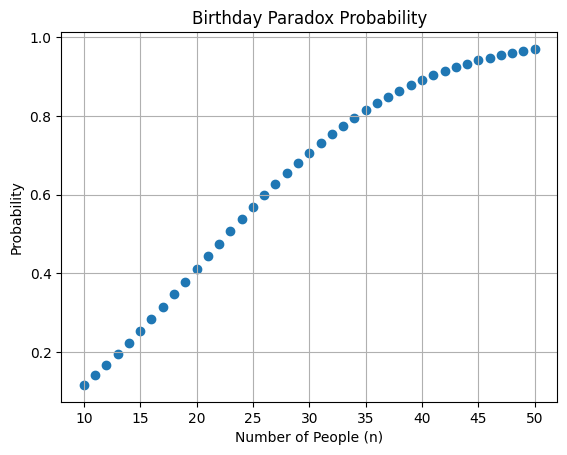

In [ ]:
import math
prob = []
for n in range(10,51):
  p = 1 - math.factorial(365)/(math.factorial(365-n)*(365**n))
  prob.append(p)
n = np.linspace(10,50,num=41)
plt.scatter(n, prob,marker='o')
plt.title('Birthday Paradox Probability')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


___
**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.
___

## Ans.

In [ ]:
def simulation_birthday(n, sim_num = 1000):
  """
  n is the number of elements in each simulation
  sim_num is the number of simulations
  """
  arr = np.zeros(sim_num)
  for i in range(sim_num):
    random = np.random.randint(1, 366, size=n)
    if len(random) != len(set(random)):
      arr[i] = 1
  prob = arr.mean()
  std_dev = arr.std(ddof = 1)
  ci_upper = prob + 1.96*std_dev/np.sqrt(sim_num)
  ci_lower = prob - 1.96*std_dev/np.sqrt(sim_num)
  return prob, ci_upper, ci_lower

estimates = []
ci_lower = []
ci_upper= []
for n in range(15,31):
  sim_prob, upper, lower = simulation_birthday(n)
  estimates.append(sim_prob)
  ci_lower.append(lower)
  ci_upper.append(upper)


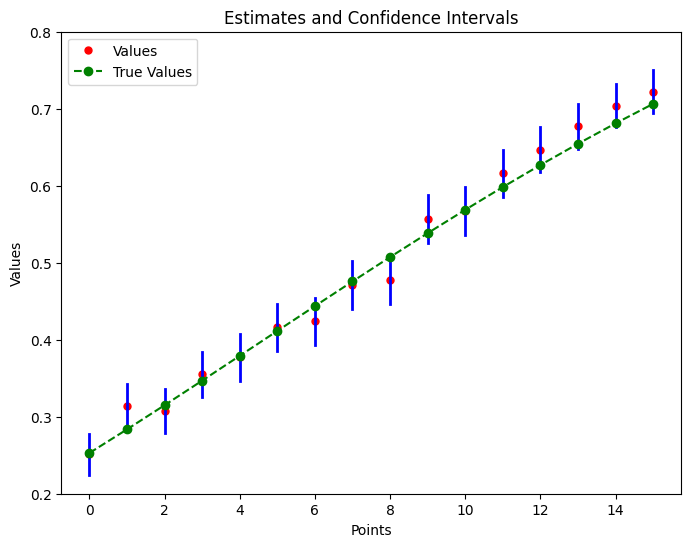

In [ ]:
values = estimates
lower_limits = ci_lower
upper_limits = ci_upper

plt.figure(figsize=(8, 6))

plt.plot(values, 'ro', label='Values',markersize=5)

for i in range(len(values)):
    plt.plot([i, i], [lower_limits[i], upper_limits[i]], 'b-', linewidth=2)

prob = []
for n in range(15,31):
  p = 1 - math.factorial(365)/(math.factorial(365-n)*(365**n))
  prob.append(p)
plt.plot(prob, color='green', linestyle='dashed', marker='o', label='True Values')

plt.legend()
plt.ylim(0.2,0.8)
plt.title('Estimates and Confidence Intervals')
plt.xlabel('Points')
plt.ylabel('Values')
plt.show()




---

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)
___

## Ans.

In [ ]:
df = pd.read_csv('bdaydata.txt',sep = ' ', converters={'date': str})
dates_t = list(map(int, df['date']))
#dates_t = dates_t.repeat(df['count']).tolist()
df['date'] = pd.to_datetime(df['date'], format='%m%d')
df['date'] = df['date'].dt.strftime('%m-%d')

In [ ]:
result_list = df['date'].repeat(df['count']).tolist()
dates_t = [int(date.replace("-", "")) for date in result_list]

#### Histogram

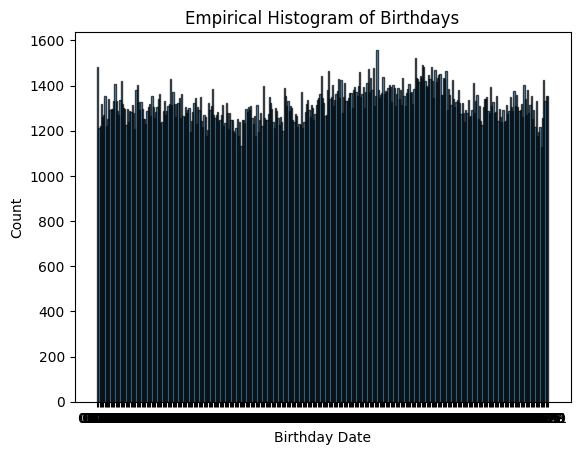

In [ ]:
plt.hist(df['date'], weights=df['count'], bins=365, edgecolor='k', alpha=0.7)
plt.xlabel('Birthday Date')
plt.ylabel('Count')
plt.title('Empirical Histogram of Birthdays')
plt.show()

#### Empirical CDF

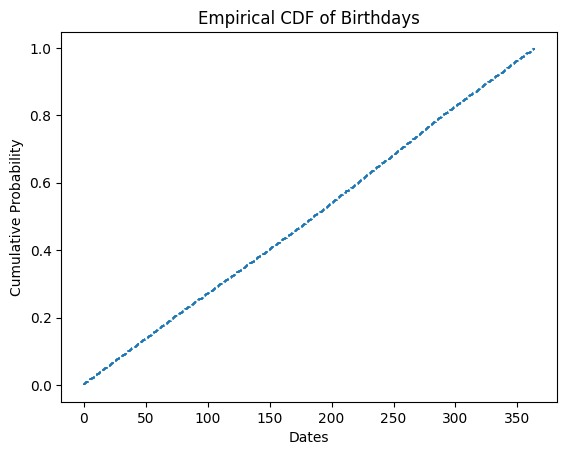

In [ ]:
x = df['date']
ecdf = []
cum = sum(df['count'])
for i in range(len(x)):
  ecdf.append(sum(df['count'][:i])/cum)
plt.plot(ecdf, label='Empirical cdf', linestyle='--', drawstyle='steps')
plt.xlabel('Dates')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF of Birthdays')
plt.show()

#### Q-Q plot

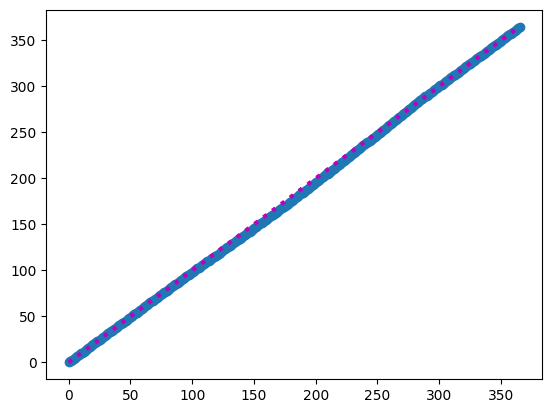

In [ ]:
import scipy.stats as stats

# Compute the PPF (quantile) for the given probability
quantile = stats.uniform.ppf(ecdf, loc=0, scale=365)
x = np.linspace(0,365,365)
plt.plot(x, quantile, 'o')  # Points in the Q-Q plot
plt.plot(x, x, ':m', linewidth=3)

___

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

___

## Ans.


#### Chi-square Test

In [ ]:
from scipy.stats import chisquare
total_count = df['count'].sum()
expected_frequency = total_count / 365
observed_frequencies = df['count']
chi2_statistic, p_value = chisquare(f_obs=observed_frequencies, f_exp=[expected_frequency]*len(df['count']))
print(f"Chi-Square Statistic: {chi2_statistic}")
print(f"p-value: {p_value}")
print('Since p-value is small enough, therefore, we reject null hypothesis that it follows uniform distribution')

Chi-Square Statistic: 1352.7233599950073
p-value: 1.2489373800065057e-113
Since p-value is small enough, therefore, we reject null hypothesis that it follows uniform distribution


#### Kolnogorov-Smirnov Test

In [ ]:
from scipy.stats import kstest, uniform
ks_statistic, ks_p_value = kstest(dates_t, cdf='uniform', args=(min(dates_t),max(dates_t)))
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
print('Since p-value is small enough, therefore, we reject null hypothesis that it follows uniform distribution')

KS Statistic: 0.08204711616571891
P-value: 0.0
Since p-value is small enough, therefore, we reject null hypothesis that it follows uniform distribution


___

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

___

## Ans.


In [ ]:
result_list = df['date'].repeat(df['count']).tolist()

In [ ]:
import random
def calculate_probability2(n, num_iterations = 1000):
    shared_birthday_count = 0
    arr = np.zeros(num_iterations)
    for i in range(num_iterations):
        sample = random.sample(result_list, n)
        if len(sample) != len(set(sample)):
            arr[i] = 1
    prob = arr.mean()
    std_dev = arr.std(ddof = 1)
    ci_upper = prob + 1.96*std_dev/np.sqrt(num_iterations)
    ci_lower = prob - 1.96*std_dev/np.sqrt(num_iterations)
    return prob, ci_upper, ci_lower

In [ ]:
estimates_bootstrap = []
ci_lower_bootstrap = []
ci_upper_bootstrap = []
for n in range(15,31):
  sim_prob, upper, lower = calculate_probability2(n)
  estimates_bootstrap.append(sim_prob)
  ci_lower_bootstrap.append(lower)
  ci_upper_bootstrap.append(upper)


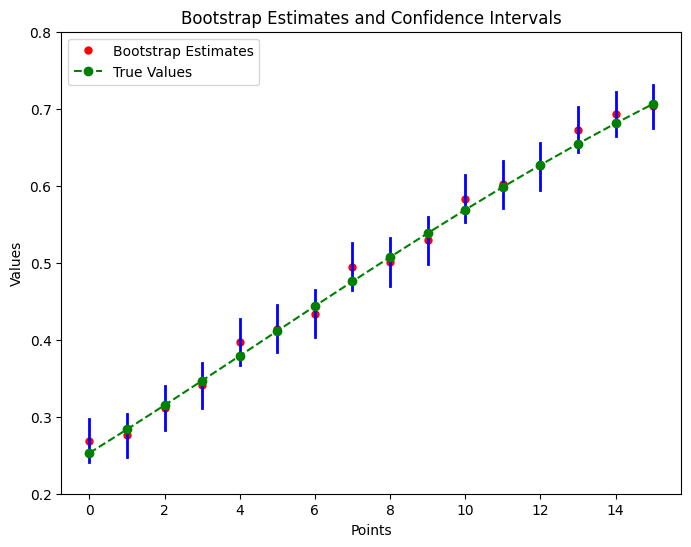

In [ ]:
import math
values = estimates_bootstrap
lower_limits = ci_lower_bootstrap
upper_limits = ci_upper_bootstrap

plt.figure(figsize=(8, 6))

plt.plot(values, 'ro', label='Bootstrap Estimates',markersize=5)

for i in range(len(values)):
    plt.plot([i, i], [lower_limits[i], upper_limits[i]], 'b-', linewidth=2)

prob = []
for n in range(15,31):
  p = 1 - math.factorial(365)/(math.factorial(365-n)*(365**n))
  prob.append(p)
plt.plot(prob, color='green', linestyle='dashed', marker='o', label='True Values')

plt.legend()
plt.ylim(0.2,0.8)
plt.title('Bootstrap Estimates and Confidence Intervals')
plt.xlabel('Points')
plt.ylabel('Values')
plt.show()

Bootstrap estimates and the randomly generated value are quite similar.

___
___

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



___

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials.
___


## Ans.

In [ ]:
n = 1500
fact_series = [math.factorial(i) for i in range(n)]
first_digit = np.zeros(n)
for i in range(n):
 first_digit[i] = int(str(fact_series[i])[0])

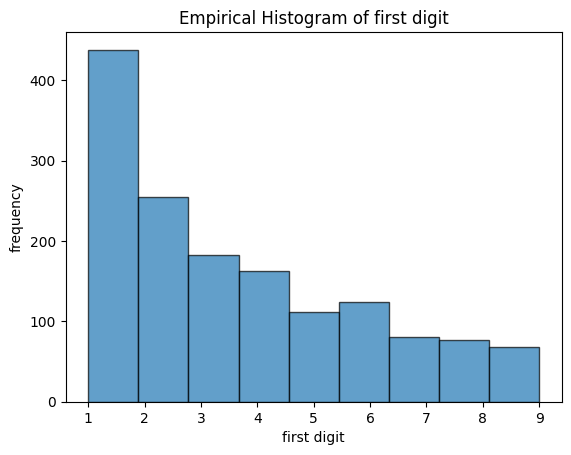

In [ ]:
plt.hist(first_digit, bins=9, edgecolor='k', alpha=0.7)
plt.xlabel('first digit')
plt.ylabel('frequency')
plt.title('Empirical Histogram of first digit')
plt.show()

___
**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

___


## Ans.

In [ ]:
counts = []
for element, ct in sorted(Counter(first_digit).items()):
  counts.append(ct)

In [ ]:
chi2_statistic, p_value = chisquare(f_obs=counts, f_exp=np.mean(counts))
print("Chi-Square Statistic: "+ str(chi2_statistic))
print("p-value: "+ str(p_value))

Chi-Square Statistic: 670.8000000000002
p-value: 1.3805718582880795e-139


Since p-value is small enough, we reject null hypothesis that it follows uniform distribution.

___

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


___

In [ ]:
def benford_pdf(d):
  return math.log(d+1, 10)-math.log(d, 10)

In [ ]:
s = []
for i in range(1,10):
  s.append(benford_pdf(i)*1500)
chi2_statistic, p_value = chisquare(f_obs=counts, f_exp=s)
print("Chi-Square Statistic: "+ str(chi2_statistic))
print("p-value: "+ str(p_value))

Chi-Square Statistic: 9.45656911846464
p-value: 0.305254833960676


Since p-value is relatively large, we accept the null hypothesis that the data follows the "Benford's Law" distribution.

___

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.
___

## Ans.

#### Histogram

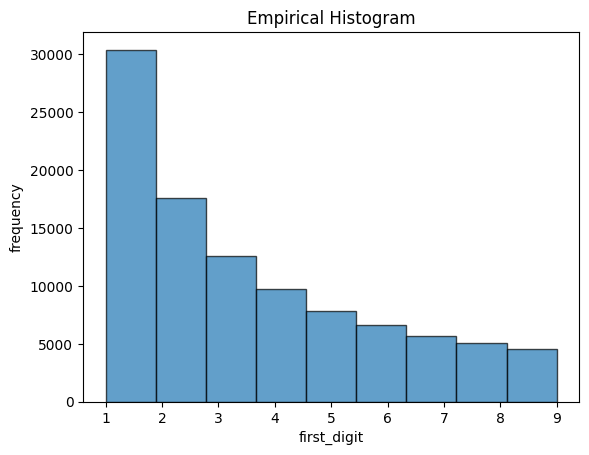

In [ ]:
dt = pd.read_csv("us_pop.csv")
n = len(dt['population'])
first_digit = np.zeros(n)
for i in range(n):
 first_digit[i] = int(str(dt['population'][i])[0])
plt.hist(first_digit, bins=9, edgecolor='k', alpha=0.7)
plt.xlabel('first_digit')
plt.ylabel('frequency')
plt.title('Empirical Histogram')
plt.show()

#### Uniform Distribution

In [ ]:
counts = []
for element, ct in sorted(Counter(first_digit).items()):
  counts.append(ct)
chi2_statistic, p_value = chisquare(f_obs=counts, f_exp=np.mean(counts))
print("Chi-Square Statistic: "+ str(chi2_statistic))
print("p-value: "+ str(p_value))

Chi-Square Statistic: 50323.53572
p-value: 0.0


Since p-value is small enough, we reject null hypothesis that it follows uniform distribution.

#### Benford Law

In [ ]:
s = []
for i in range(1,10):
  s.append(benford_pdf(i)*sum(counts))
chi2_statistic, p_value = chisquare(f_obs=counts, f_exp=s)
print("Chi-Square Statistic: "+ str(chi2_statistic))
print("p-value: "+ str(p_value))

Chi-Square Statistic: 11.843226818111347
p-value: 0.1583369813784756


Since p-value is relatively large, we accept the null hypothesis that the data follows the "Benford's Law" distribution.

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.